In [1]:
# Scipy
from scipy import signal, ndimage, fft
from scipy.signal import butter, lfilter, freqz

# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

## Creating signals

In [2]:
# Adds noise to a signal
def add_noise(signal, noise_type, noise_level):
    if noise_type == 'gaussian':
        noise = np.random.normal(0, noise_level, signal.shape)
    elif noise_type == 'poisson':
        noise = np.random.poisson(noise_level, signal.shape)
    elif noise_type == 'speckle':
        noise = np.random.randn(*signal.shape) * noise_level
    return signal + noise


In [3]:
# Create a signal
def create_signal(signal_type, signal_length, signal_level):
    if signal_type == 'sinusoidal':
        signal = np.sin(np.linspace(0, 2 * np.pi, signal_length))
    elif signal_type == 'square':
        signal = signal.square(np.linspace(0, 2 * np.pi, signal_length))
    elif signal_type == 'sawtooth':
        signal = signal.sawtooth(np.linspace(0, 2 * np.pi, signal_length))
    elif signal_type == 'impulse':
        signal = np.zeros(signal_length)
        signal[signal_length // 2] = 1
    elif signal_type == 'step':
        signal = np.zeros(signal_length)
        signal[signal_length // 2:] = 1
    elif signal_type == 'ramp':
        signal = np.linspace(0, 1, signal_length)
    elif signal_type == 'white_noise':
        signal = np.random.randn(signal_length)
    elif signal_type == 'pink_noise':
        signal = np.random.randn(signal_length)
        signal = np.cumsum(signal) / np.arange(1, signal_length + 1)
    elif signal_type == 'brown_noise':
        signal = np.random.randn(signal_length)
        signal = np.cumsum(signal)
    return signal * signal_level

# Plot a signal
def plot_signal(signal, title, xlabel, ylabel, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(signal)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot a signal spectrum
def plot_signal_spectrum(signal, title, xlabel, ylabel, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.magnitude_spectrum(signal, Fs=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot a signal and its spectrum
def plot_signal_and_spectrum(signal, title, xlabel, ylabel, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(2, 1, 1)
    plt.title(title)
    plt.plot(signal)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.subplot(2, 1, 2)
    plt.magnitude_spectrum(signal, Fs=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    

## Filters

In [4]:
# Low pass filter a signal
def low_pass_filter(signal_input, cutoff, order):
    b, a = signal.butter(order, cutoff, btype='lowpass', analog=False)
    return signal.filtfilt(b, a, signal_input)

# High pass filter a signal
def high_pass_filter(signal_input, cutoff, order):
    b, a = signal.butter(order, cutoff, btype='highpass', analog=False)
    return signal.filtfilt(b, a, signal_input)

# Band pass filter a signal
def band_pass_filter(signal_input, cutoff_low, cutoff_high, order):
    b, a = signal.butter(order, [cutoff_low, cutoff_high], btype='bandpass', analog=False)
    return signal.filtfilt(b, a, signal_input)

# Band stop filter a signal
def band_stop_filter(signal_input, cutoff_low, cutoff_high, order):
    b, a = signal.butter(order, [cutoff_low, cutoff_high], btype='bandstop', analog=False)
    return signal.filtfilt(b, a, signal_input)

# Gaussian filter a signal
def gaussian_filter(signal_input, sigma):
    return ndimage.gaussian_filter(signal_input, sigma)

# Median filter a signal
def median_filter(signal_input, size):
    return ndimage.median_filter(signal_input, size)

# sos filter a signal
def sos_filter(signal_input, sos):
    return signal.sosfilt(sos, signal_input)
    

## Test

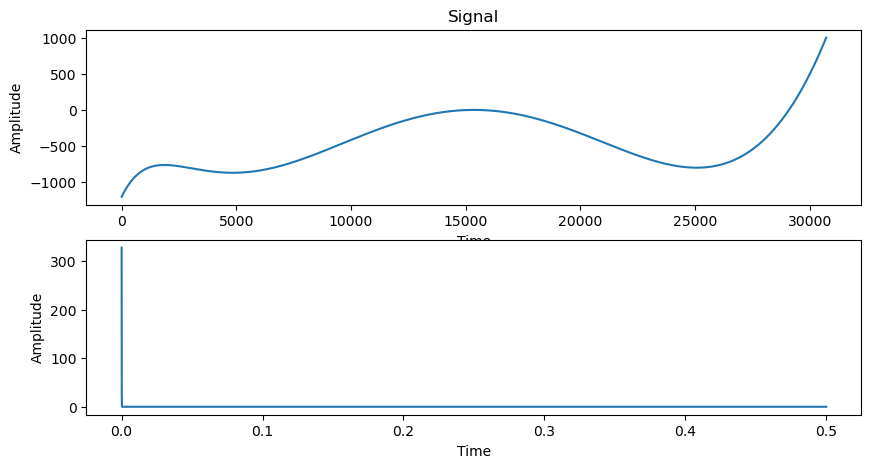

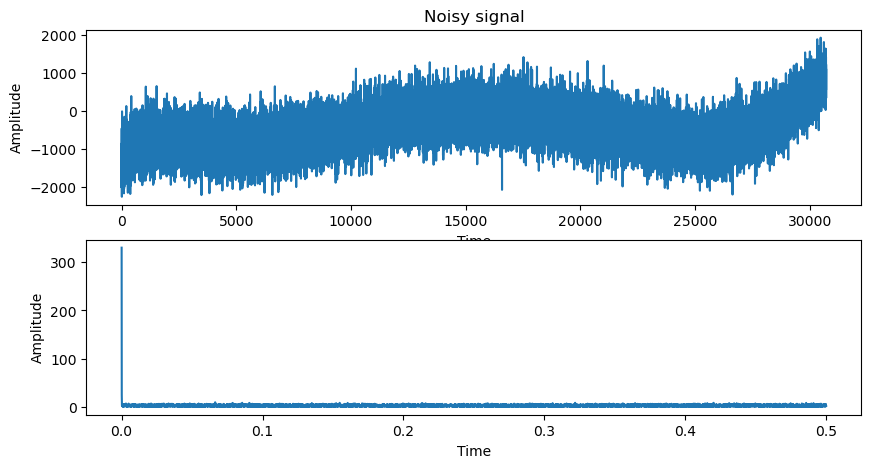

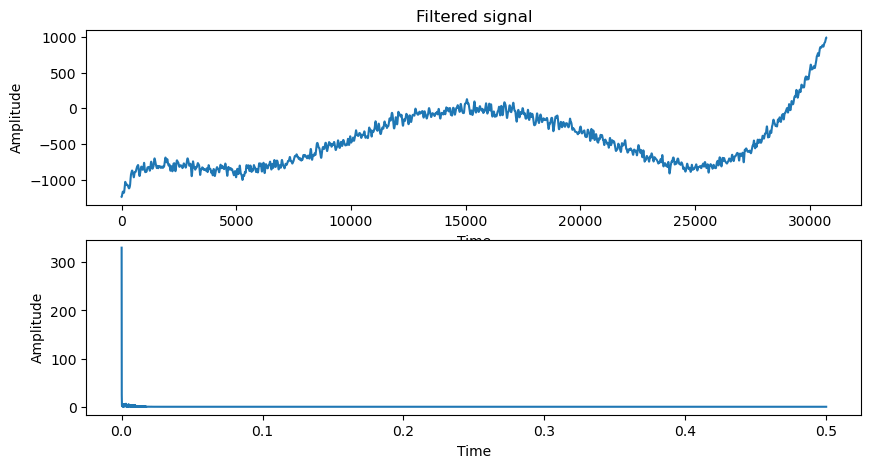

In [5]:
duration = 30
sample_rate = 1024

x = np.linspace(-10,  10, duration * sample_rate)
y = 0.5 * x ** 4 - 40 * x ** 2 - 0.1 / np.exp(x)
noisy_y = add_noise(y, 'gaussian', 400)
plot_signal_and_spectrum(y, 'Signal', 'Time', 'Amplitude')
plot_signal_and_spectrum(noisy_y, 'Noisy signal', 'Time', 'Amplitude')
filtered_y = gaussian_filter(noisy_y, 20)
plot_signal_and_spectrum(filtered_y, 'Filtered signal', 'Time', 'Amplitude')

## Audio

/tmp/ipykernel_2056/4075800834.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(filename)


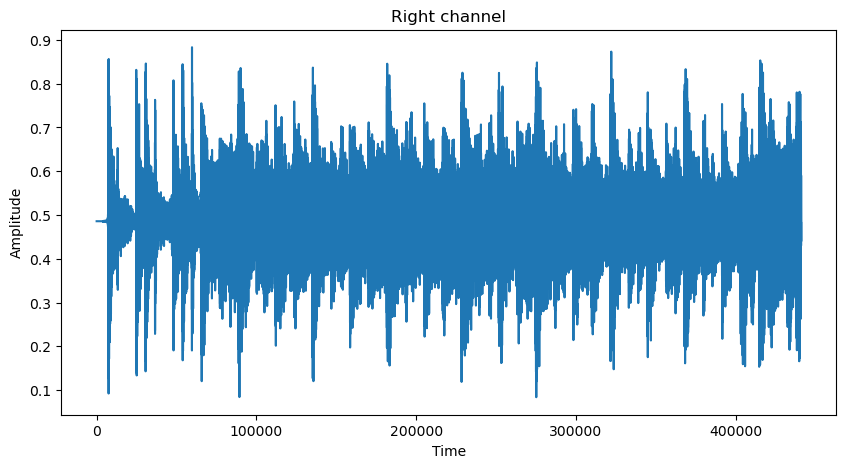

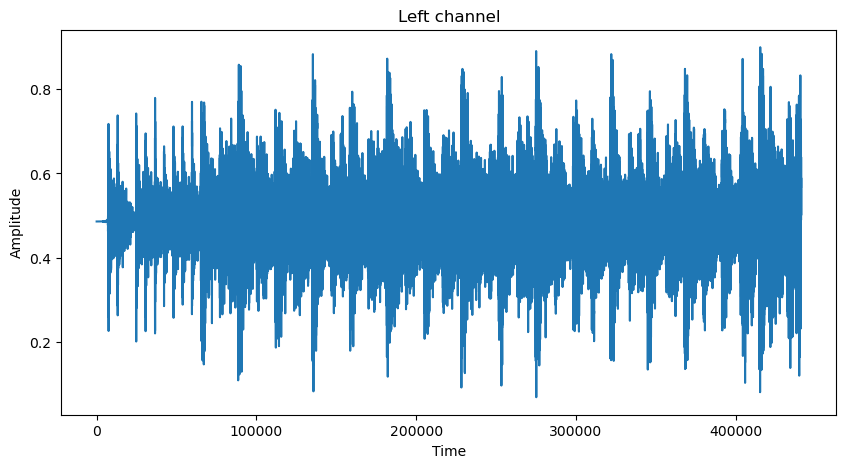

In [7]:
from scipy.io import wavfile
filename = '../../../audio.wav'

sample_rate, samples = wavfile.read(filename)
samples = (samples.astype(np.float32) - samples.min()) / (samples.max().astype(float) - samples.min()) 

# right channel
right = samples[:, 1]
left = samples[:, 0]


# Crop the samples to the desired length
duration = 10
cropped_right = right[:duration * sample_rate]
cropped_left = left[:duration * sample_rate]

# Plot the cropped samples
plot_signal(cropped_right, 'Right channel', 'Time', 'Amplitude')
plot_signal(cropped_left, 'Left channel', 'Time', 'Amplitude')


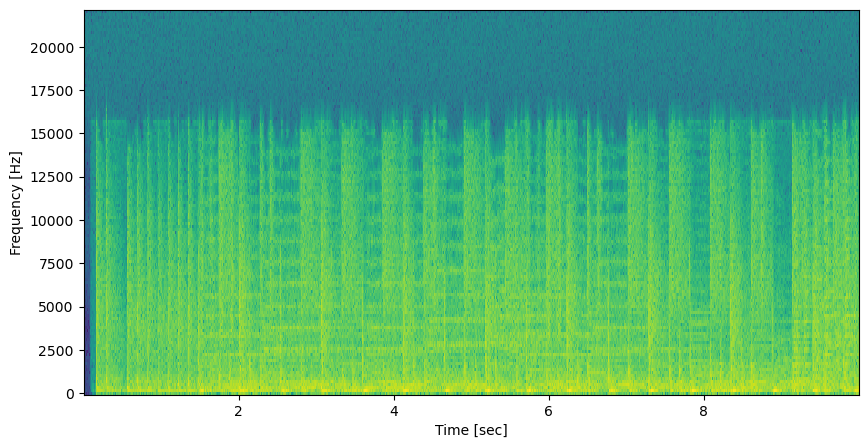

In [10]:
# Audio spectrum

freqs, times, spectrogram = signal.spectrogram(cropped_left, fs=sample_rate)

plt.figure(figsize=(10, 5))
plt.pcolormesh(times, freqs, np.log(spectrogram))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()